# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [9]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from src.models.linear import fit, plot
from src.constants import WANDB_DATA

In [11]:
df = pd.read_csv(WANDB_DATA)
df_filtered = df[0:10]
df_filtered["name"]

0     cd_1.5
1     cd_1.7
2      cd2.1
3    iter_10
4     cd_2.0
5     cd_1.0
6     cd_1.2
7     cd_2.7
8    cd_norm
9     cd_1.4
Name: name, dtype: object

In [12]:
df_filtered[df_filtered["state"] == "finished"]

,config_animate,config_atm,config_atmos,config_coup,config_gcc,config_gfortran,config_name,config_notes,config_oc,config_ocean,...,end_ocean_run,end_trend_nino1+2,end_trend_nino3,end_trend_nino3.4,end_trend_nino4,end_trend_pac,name,state,tags,url
2,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0021, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd2.1,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,611.403570,0.545854,0.267445,0.289337,0.519428,0.559440,cd2.1,finished,[],https://wandb.ai/sdat2/seager19/runs/38x0f2kg
6,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0012, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.2,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1536.788786,0.560243,0.375186,0.375603,0.541339,0.568021,cd_1.2,finished,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie
7,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0027, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1534.777277,0.561919,0.200153,0.221862,0.500907,0.554369,cd_2.7,finished,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn
8,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_norm,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1416.614244,0.548096,0.250295,0.273214,0.515109,0.558128,cd_norm,finished,[],https://wandb.ai/sdat2/seager19/runs/3ke8yisi
9,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0014, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.4,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1408.525637,0.552706,0.350710,0.357990,0.537039,0.566020,cd_1.4,finished,[],https://wandb.ai/sdat2/seager19/runs/2um7xc7h


In [13]:
eval(df_filtered[df_filtered["state"] == "finished"]["config_coup"][2])["c_d"]

0.0021

In [84]:
from uncertainties import ufloat

def tex_param(uf: ufloat, bracket: bool=False) -> str:
    """
    A tool to take an uncertainty object, and return a latex string
    for plotting, which has the right number of decimal places.

    Args:
        uf (ufloat): The uncertainties ufloat object.
        bracket (bool, optional): Whether or not to add latex brackets around
            the parameter. Defaults to False.

    Returns:
        str: Raw string ready to be added to a graph label.
    """
    sf = round(np.log10(abs(uf.n)) - np.log10(abs(uf.s)))
    if bracket:
        fs = "$\\left({:." + str(sf) + "eL} \\right)$"
    else:
        fs = "${:." + str(sf) + "eL}$"
    return fs.format(uf)


In [78]:
round(np.log10(param[1].n) - np.log10(param[1].s))

2

In [79]:
tex_param(param[1], bracket=True)

'$\\left(\\left(5.00 \\pm 0.05\\right) \\times 10^{-1} \right)$'

In [71]:
param[0].n

-101.73939439678333

In [54]:
param[1].s

0.005189535953965309

(array([-101.73939439678333+/-2.5842905236199925,
        0.4999583307204756+/-0.005189535953965309], dtype=object),
 <function src.models.linear._return_func.<locals>.lin(x)>)

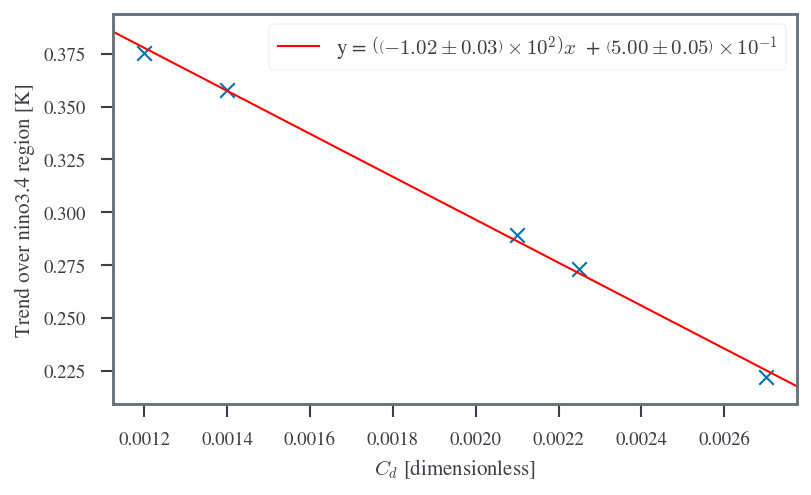

In [103]:
plot(cd_list, nino_34_list, x_label="$C_d$ [dimensionless]", y_label=r"Trend over nino3.4 region [K]")

In [ ]:
plot(cd_list, nino_34_list)

Text(0, 0.5, 'Trend over nino3.4 region [K]')

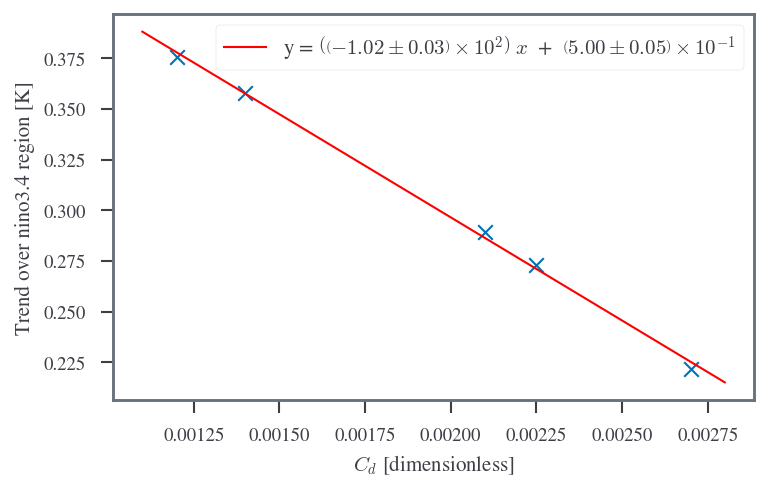

In [101]:
cd_list = list()

for coup_dict_str in df_filtered[df_filtered["state"] == "finished"]["config_coup"]:
    coup_dict = eval(coup_dict_str)
    cd_list.append(coup_dict['c_d'])

nino_34_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

plt.scatter(cd_list, nino_34_list)

param, func = fit(cd_list, nino_34_list)
x_pred = np.linspace(min(cd_list)-1e-4, max(cd_list)+1e-4, num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = " + tex_param(param[0], bracket=True) + " $x$  +  "+ tex_param(param[1], bracket=False), color='red')
plt.legend()
plt.xlabel("$C_d$ [dimensionless]")
plt.ylabel(r"Trend over nino3.4 region [K]")

In [104]:
nino_12_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino1+2'].tolist()

(array([28448.707127454847+/-446.2769451572455,
        -109.68521024124762+/-1.7194477935780395,
        0.6507366114148307+/-0.0015437243122143132], dtype=object),
 <function src.models.linear._return_func.<locals>.parab(x)>)

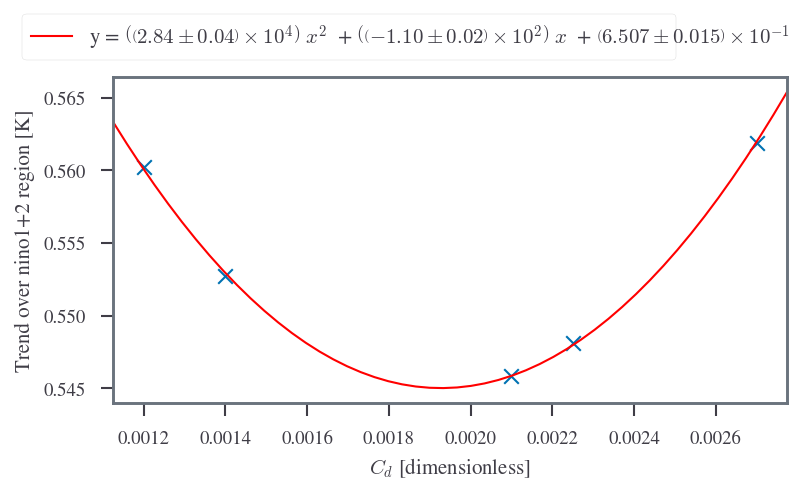

In [107]:
plot(cd_list, nino_12_list, reg_type="parab", x_label="$C_d$ [dimensionless]", y_label=r"Trend over nino1+2 region [K]")

In [39]:
df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

[0.2893372901599713,
 0.3756030916768101,
 0.2218623636697925,
 0.2732137618555352,
 0.3579899903177476]

In [45]:
from src.models.linear import fit

Text(0.5, 0, 'Number of modes in the ocean')

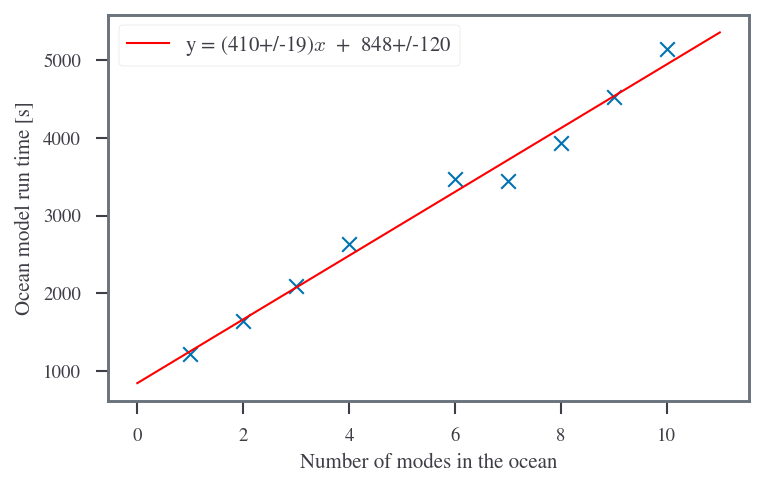

In [86]:
uncoup_df = df[11:]
uncoup_df = uncoup_df[uncoup_df["state"] == "finished"]
nummode_list = list()

for coup_dict_str in uncoup_df[uncoup_df["state"] == "finished"]["config_oc"]:
    coup_dict = eval(coup_dict_str)
    nummode_list.append(coup_dict['nummode'])

ocean_run_list = uncoup_df[uncoup_df["state"] == "finished"]['end_ocean_run'].tolist()


plt.scatter(nummode_list, ocean_run_list)
param, func = fit(nummode_list, ocean_run_list)
x_pred = np.linspace(min(nummode_list)-1, max(nummode_list)+1, num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = ({:2.0f}".format(param[0]) + ")$x$  +  {:2.0f}".format(param[1]), color='red')
plt.legend()
plt.ylabel("Ocean model run time [s]")
plt.xlabel("Number of modes in the ocean")

In [82]:
df

,config_animate,config_atm,config_atmos,config_coup,config_gcc,config_gfortran,config_name,config_notes,config_oc,config_ocean,...,end_ocean_run,end_trend_nino1+2,end_trend_nino3,end_trend_nino3.4,end_trend_nino4,end_trend_pac,name,state,tags,url
0,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 1.5, 'rho_air': 1.225, 'iterations': 5}",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.5,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_1.5,running,[],https://wandb.ai/sdat2/seager19/runs/q7wepo0q
1,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0017, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_1.7,running,[],https://wandb.ai/sdat2/seager19/runs/1iqk78iv
2,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0021, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd2.1,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,611.403570,0.545854,0.267445,0.289337,0.519428,0.559440,cd2.1,finished,[],https://wandb.ai/sdat2/seager19/runs/38x0f2kg
3,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,iter_10,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,iter_10,running,[],https://wandb.ai/sdat2/seager19/runs/1z4nbr57
4,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.002, 'rho_air': 1.225, 'iterations': 5}",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.0,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_2.0,running,[],https://wandb.ai/sdat2/seager19/runs/2bba40eq
5,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.001, 'rho_air': 1.225, 'iterations': 5}",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.0,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_1.0,running,[],https://wandb.ai/sdat2/seager19/runs/1f7i2qtn
6,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0012, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.2,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1536.788786,0.560243,0.375186,0.375603,0.541339,0.568021,cd_1.2,finished,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie
7,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0027, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1534.777277,0.561919,0.200153,0.221862,0.500907,0.554369,cd_2.7,finished,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn
8,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_norm,test,"{'nummode': 2, 'boundaries': 'Pe

In [80]:
uncoup_df

[11     True
 12     True
 13     True
 14     True
 15     True
 16    False
 17     True
 18     True
 19     True
 20     True
 Name: state, dtype: bool]

In [97]:
import wandb_summarizer.download

run_info = wandb_summarizer.download.get_results("sdat2/seager19")
print(run_info[0]["url"])

https://wandb.ai/sdat2/seager19/runs/3290eveu


In [100]:
pd.DataFrame(run_info)[1: 11]

,tags,url,name,state,created_at,description,end_trend_pac,end__step,end_trend_nino1+2,end_mean_pac,...,config_coup,config_name,config_test,config_user,config_atmos,config_notes,config_ocean,config_animate,config_project,config_gfortran
1,[],https://wandb.ai/sdat2/seager19/runs/vf5mt15q,cd_2.25,finished,2021-06-18T07:14:15,cd_2.25\ntest,0.558052,5.0,0.545379,26.249826,...,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",cd_2.25,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
2,[],https://wandb.ai/sdat2/seager19/runs/suszf2cj,cd_2.5,finished,2021-06-17T19:38:34,cd_2.5\ntest,0.555918,5.0,0.550769,26.248495,...,"{'c_d': 0.0025, 'rho_air': 1.225, 'iterations'...",cd_2.5,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
3,[],https://wandb.ai/sdat2/seager19/runs/3jcljvx5,cd_3.0,finished,2021-06-17T19:26:54,cd_3.0\ntest,0.551905,5.0,0.570430,26.245897,...,"{'c_d': 0.003, 'rho_air': 1.225, 'iterations': 6}",cd_3.0,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
4,[],https://wandb.ai/sdat2/seager19/runs/176yerzi,cd_1.0,finished,2021-06-17T16:42:18,cd_1.0\ntest,0.570056,5.0,0.570144,26.256672,...,"{'c_d': 0.001, 'rho_air': 1.225, 'iterations': 6}",cd_1.0,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
5,[],https://wandb.ai/sdat2/seager19/runs/184vohdn,cd_2.0,finished,2021-06-17T16:41:05,cd_2.0\ntest,0.560275,5.0,0.543201,26.251177,...,"{'c_d': 0.002, 'rho_air': 1.225, 'iterations': 6}",cd_2.0,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
6,[],https://wandb.ai/sdat2/seager19/runs/1levxkju,cd_1.7,finished,2021-06-17T16:38:53,cd_1.7\ntest,0.563072,5.0,0.545005,26.252819,...,"{'c_d': 0.0017, 'rho_air': 1.225, 'iterations'...",cd_1.7,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
7,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie,cd_1.2,finished,2021-06-16T22:01:40,cd_1.2\ntest,0.568021,4.0,0.560243,26.255571,...,"{'c_d': 0.0012, 'rho_air': 1.225, 'iterations'...",cd_1.2,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
8,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn,cd_2.7,finished,2021-06-16T22:01:30,cd_2.7\ntest,0.554369,4.0,0.561919,26.247383,...,"{'c_d': 0.0027, 'rho_air': 1.225, 'iterations'...",cd_2.7,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
9,[],https://wandb.ai/sdat2/seager19/runs/3ke8yisi,cd_norm,finished,2021-06-16T18:34:06,cd_norm\ntest,0.558128,4.0,0.548096,26.249804,...,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",cd_norm,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...
10,[],https://wandb.ai/sdat2/seager19/runs/2um7xc7h,cd_1.4,finished,2021-06-16T18:32:10,cd_1.4\ntest,0.566020,4.0,0.552706,26.254467,...,"{'c_d': 0.0014, 'rho_air': 1.225, 'iterations'...",cd_1.4,True,sdat2,True,test,"{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",True,seager19,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...


Text(0, 0.5, '$\\Delta \\bar{T}_s$ over nino3.4 region [$\\Delta$ K]')

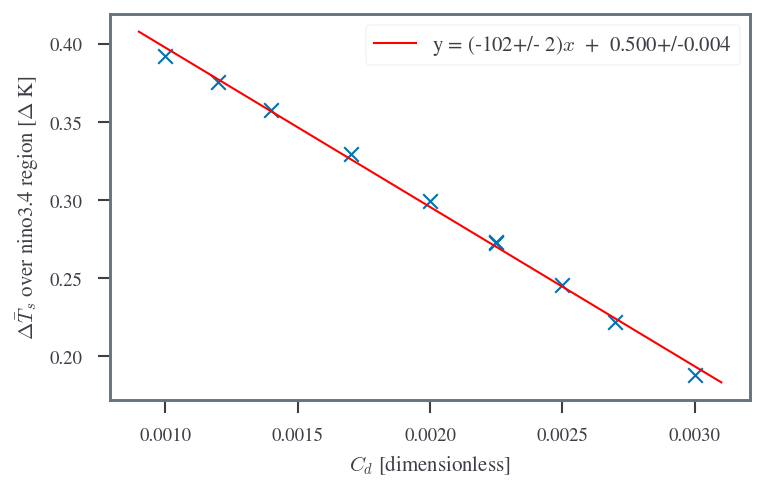

In [105]:
df_filtered = pd.DataFrame(run_info)[1: 11]

cd_list = list()

for coup_dict_str in df_filtered[df_filtered["state"] == "finished"]["config_coup"]:
    coup_dict = eval(coup_dict_str)
    cd_list.append(coup_dict['c_d'])

nino_34_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

plt.scatter(cd_list, nino_34_list)

param, func = fit(cd_list, nino_34_list)
x_pred = np.linspace(min(cd_list)-1e-4, max(cd_list)+1e-4, num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = ({:2.0f}".format(param[0]) + ")$x$  +  {:2.3f}".format(param[1]), color='red')
plt.legend()
plt.xlabel("$C_d$ [dimensionless]")
plt.ylabel(r"$\Delta \bar{T}_s$ over nino3.4 region [$\Delta$ K]")

Text(0, 0.5, '$\\Delta \\bar{T}_s$ over nino3.4 region [$\\Delta$ K]')

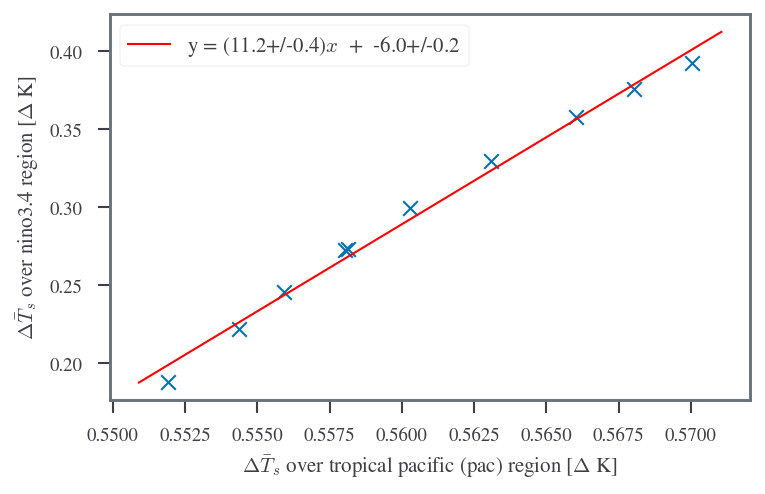

In [110]:
df_filtered = pd.DataFrame(run_info)[1: 11]

cd_list = list()

for coup_dict_str in df_filtered[df_filtered["state"] == "finished"]["config_coup"]:
    coup_dict = eval(coup_dict_str)
    cd_list.append(coup_dict['c_d'])
    
    
pac_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_pac'].tolist()


nino_34_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

plt.scatter(pac_list, nino_34_list)

param, func = fit(pac_list, nino_34_list)
x_pred = np.linspace(min(pac_list)-1e-3, max(pac_list)+1e-3, num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = ({:2.1f}".format(param[0]) + ")$x$  +  {:2.1f}".format(param[1]), color='red')
plt.legend()
plt.xlabel(r"$\Delta \bar{T}_s$ over tropical pacific (pac) region [$\Delta$ K]")
plt.ylabel(r"$\Delta \bar{T}_s$ over nino3.4 region [$\Delta$ K]")